In [14]:
import math
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

## MNIST Dataset
The MNIST dataset has thousands of images of handwritten digits from 0 to 9. The following image shows examples of some of the data I will be using from the dataset to train my machine learning model

In [15]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Explore data
Dataset data:
- `x_train` collection (*size: 60000*) of digit images (28x28) for training
- `y_train` collection (*size: 60000*) of digit labels for training
- `x_test` collection (*size: 10000*) of digit images (28x28) for testing
- `y_test` collection (*size: 10000*) of digit labels for testing

### One entry

A image represent a array 28x28 values, in range `[0...255]`

In [16]:
# get random sample
r_indx = np.random.randint(x_train.shape[0])
r_image = x_train[r_indx]
r_label = y_train[r_indx]

# show image data 
pd.DataFrame(r_image)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,113,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


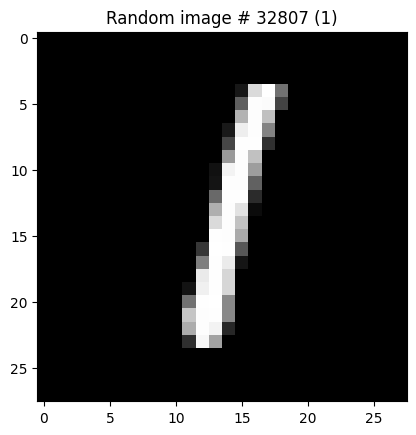

In [17]:
# show image
plt.imshow(r_image, cmap='gray')
plt.title(f'Random image # {r_indx} ({r_label})')
plt.show()

### Check some other data

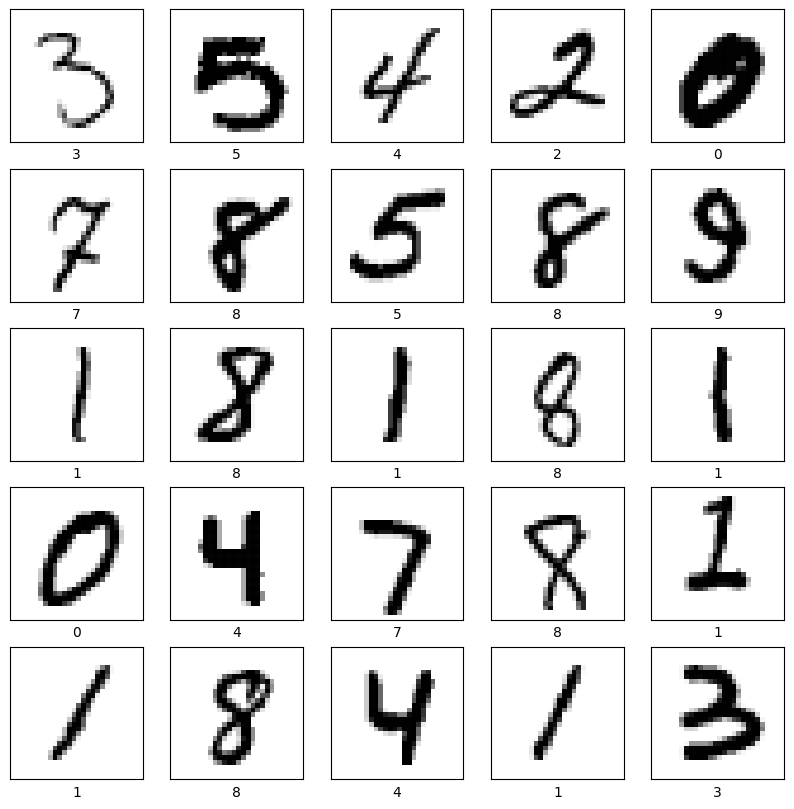

In [18]:
numbers_to_display = 25
num_cells = 5
plt.figure(figsize=(10,10))

indxs = np.random.choice(len(x_train), numbers_to_display)

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[indxs[i]], cmap=plt.cm.binary)
    plt.xlabel(y_train[indxs[i]])
plt.show()

## Normalize data
Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [19]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


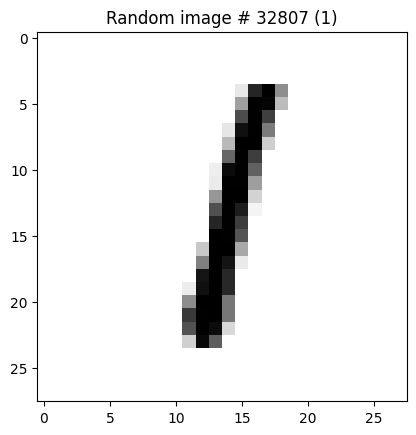

In [20]:
plt.imshow(x_train_normalized[r_indx], cmap=plt.cm.binary)
plt.title(f'Random image # {r_indx} ({r_label})')
plt.show()

## Build the model

In [21]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

D:\code\python\optima-ai-course\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [23]:
training_history = model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8758 - loss: 0.7692 - val_accuracy: 0.9475 - val_loss: 0.3275
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9554 - loss: 0.3038 - val_accuracy: 0.9564 - val_loss: 0.2757
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.2594 - val_accuracy: 0.9608 - val_loss: 0.2543
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.2373 - val_accuracy: 0.9656 - val_loss: 0.2254
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.2231 - val_accuracy: 0.9718 - val_loss: 0.2010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9670 - loss: 0.2129 - val_accuracy: 0.9604 - val_loss: 0.2291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9692 - loss: 0.2005 - val_accuracy: 0.9652 - val_loss: 0.2111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9702 - loss: 0.1942 - 

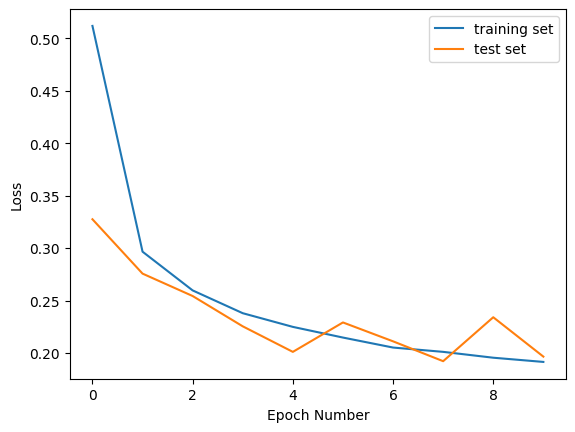

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()
plt.show()

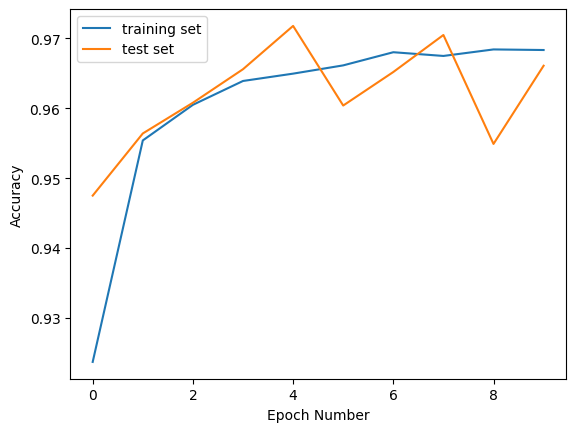

In [25]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()
plt.show()

In [26]:
loss,accuracy=model.evaluate(x_test_normalized,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.2181  


In [27]:
loss

0.19650624692440033

## Save model

In [28]:
model.save('my_digit_recognizer.keras')
accuracy

0.9660999774932861

## Run and use model

In [29]:
# load model 
digit_predictor = tf.keras.models.load_model('my_digit_recognizer.keras')

# test data 
_,(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test_normalized = x_test / 255

### Check one entry

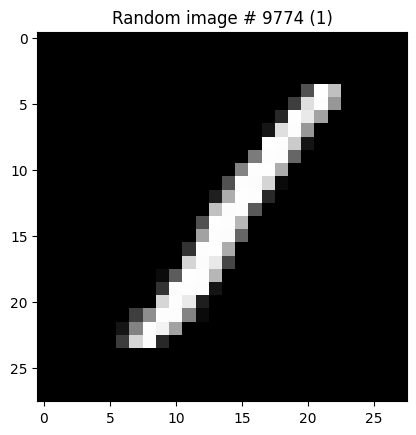

In [30]:
# get random sample
r_indx = np.random.randint(x_test_normalized.shape[0])
r_image = x_test_normalized[r_indx]
r_label = y_test[r_indx]

plt.imshow(r_image, cmap='gray')
plt.title(f'Random image # {r_indx} ({r_label})')
plt.show()

In [31]:
# predict number
prediction = digit_predictor.predict(np.array([x_test_normalized[r_indx],]))
pd.DataFrame(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.000002,0.998215,0.000346,0.000046,0.000141,0.000015,0.000008,0.001029,0.000179,0.000018


In [32]:
number = np.argmax(prediction, axis=1)
print(f'Result: {number[0]}')

Result: 1


### Check all data

In [33]:
predict_all = digit_predictor.predict([x_test_normalized])


127/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

D:\code\python\optima-ai-course\venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


D:\code\python\optima-ai-course\venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [34]:
pd.DataFrame(predict_all)

,0,1,2,3,4,5,6,7,8,9
0,2.472335e-05,2.909013e-06,2.715514e-03,3.622679e-04,3.690029e-08,1.474948e-05,1.064070e-09,9.968131e-01,6.001521e-06,6.070508e-05
1,2.866538e-04,1.161852e-04,9.979182e-01,4.688386e-04,1.086746e-08,5.155106e-06,8.897304e-05,4.591677e-07,1.115529e-03,1.923321e-08
2,6.789185e-05,9.812128e-01,9.002035e-03,4.586467e-04,3.725654e-04,9.995029e-05,2.227579e-04,5.980372e-03,2.457215e-03,1.257839e-04
3,9.761711e-01,2.191701e-05,1.066990e-02,1.035471e-04,1.001366e-04,1.872388e-04,1.653804e-03,1.050877e-02,1.724552e-06,5.818883e-04
4,3.860628e-05,2.668402e-06,7.555218e-05,1.192499e-05,9.908623e-01,2.696050e-05,2.810673e-05,1.368283e-04,4.272109e-06,8.812747e-03
...,...,...,...,...,...,...,...,...,...,...
9995,5.112354e-07,1.675598e-05,9.999031e-01,6.353649e-05,1.990794e-12,2.201269e-08,4.233516e-09,1.350192e-05,2.579732e-06,7.469892e-10
9996,4.014220e-07,4.096897e-05,3.225937e-04,9.978630e-01,3.398998e-08,1.490654e-03,4.985973e-09,3.306669e-06,1.211115e-05,2.669576e-04
9997,3.166632e-07,8.479394e-06,6.225800e-08,2.154419e-06,9.922191e-01,4.227689e-07,2.265564e-07,1.291162e-04,2.453465e-05,7.615621e-03
9998,2.371276e-03,2.155787e-05,1.542711e-05,2.355319e-04,5.144597e-08,9.906184e-01,1.997170e-03,1.320906e-05,4.725417e-03,2.090029e-06


In [35]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predict_all, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [36]:
# get fall predictions
fall_predictions = []
for i in range(len(predictions)):
    predict_result = predictions[i]
    real_label = y_test[i]
    # print(predict_result)
    if predict_result != real_label:
        fall_predictions.append([x_test_normalized[i], predict_result, real_label])

In [37]:
pd.DataFrame(fall_predictions)

,0,1,2
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,4
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,4
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,8
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,4
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,6
...,...,...,...
334,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,4
335,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6,5
336,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,3
337,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,3


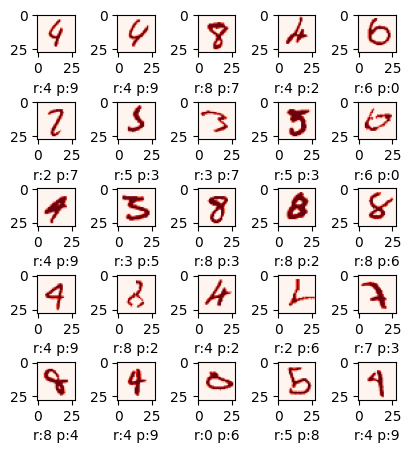

In [38]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(5, 5))

for i in range(numbers_to_display):    
    plt.subplot(num_cells, num_cells, i + 1)
    plt.imshow(fall_predictions[i][0], cmap='Reds')
    plt.xlabel(f'r:{fall_predictions[i][2]} p:{fall_predictions[i][1]}')
    
plt.subplots_adjust(hspace=1.3, wspace=0.2)
plt.show()

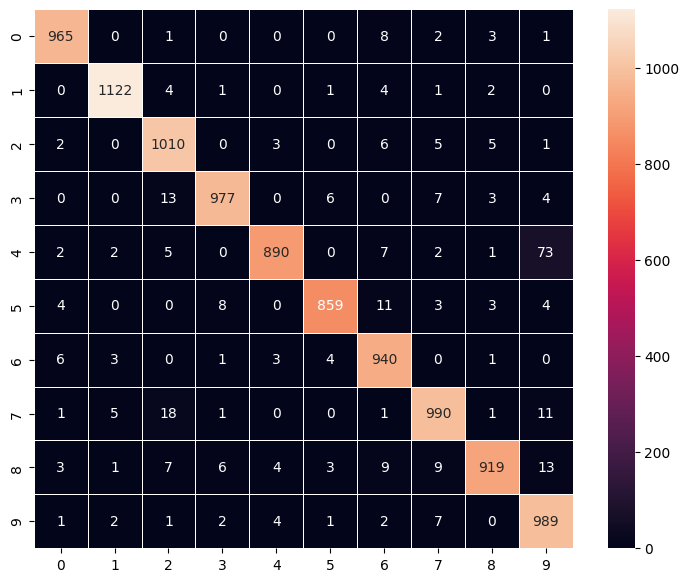

In [39]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()